In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
df =pd.read_csv('SalaryMulti.csv')
df.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Experience            1000 non-null   int64  
 1   Team Lead Experience        1000 non-null   int64  
 2   Project Manager Experience  1000 non-null   int64  
 3   Certifications              1000 non-null   int64  
 4   Salary                      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [6]:
df.isnull().sum()

Total Experience              0
Team Lead Experience          0
Project Manager Experience    0
Certifications                0
Salary                        0
dtype: int64

In [7]:
df.corr()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
Total Experience,1.000000,0.652856,0.477662,-0.019265,0.941849
Team Lead Experience,0.652856,1.000000,-0.100659,-0.029226,0.753772
Project Manager Experience,0.477662,-0.100659,1.000000,0.015441,0.405786
Certifications,-0.019265,-0.029226,0.015441,1.000000,0.009678
Salary,0.941849,0.753772,0.405786,0.009678,1.000000


<Axes: >

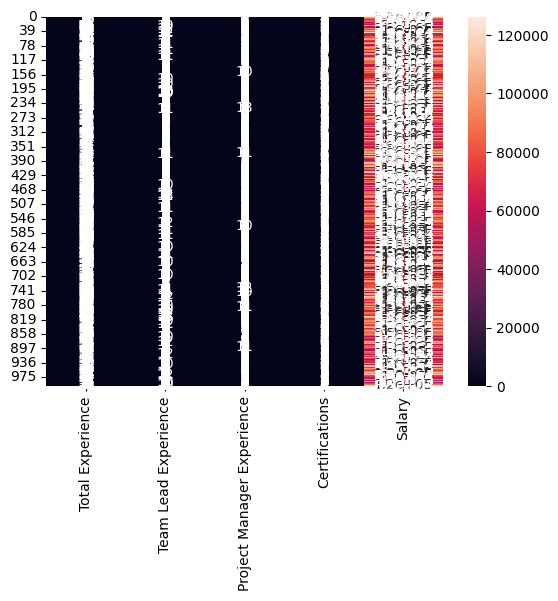

In [10]:
sns.heatmap(data=df, annot=True)

c:\Users\91976\Videos\project1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91976\Videos\project1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91976\Videos\project1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\91976\Videos\project1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

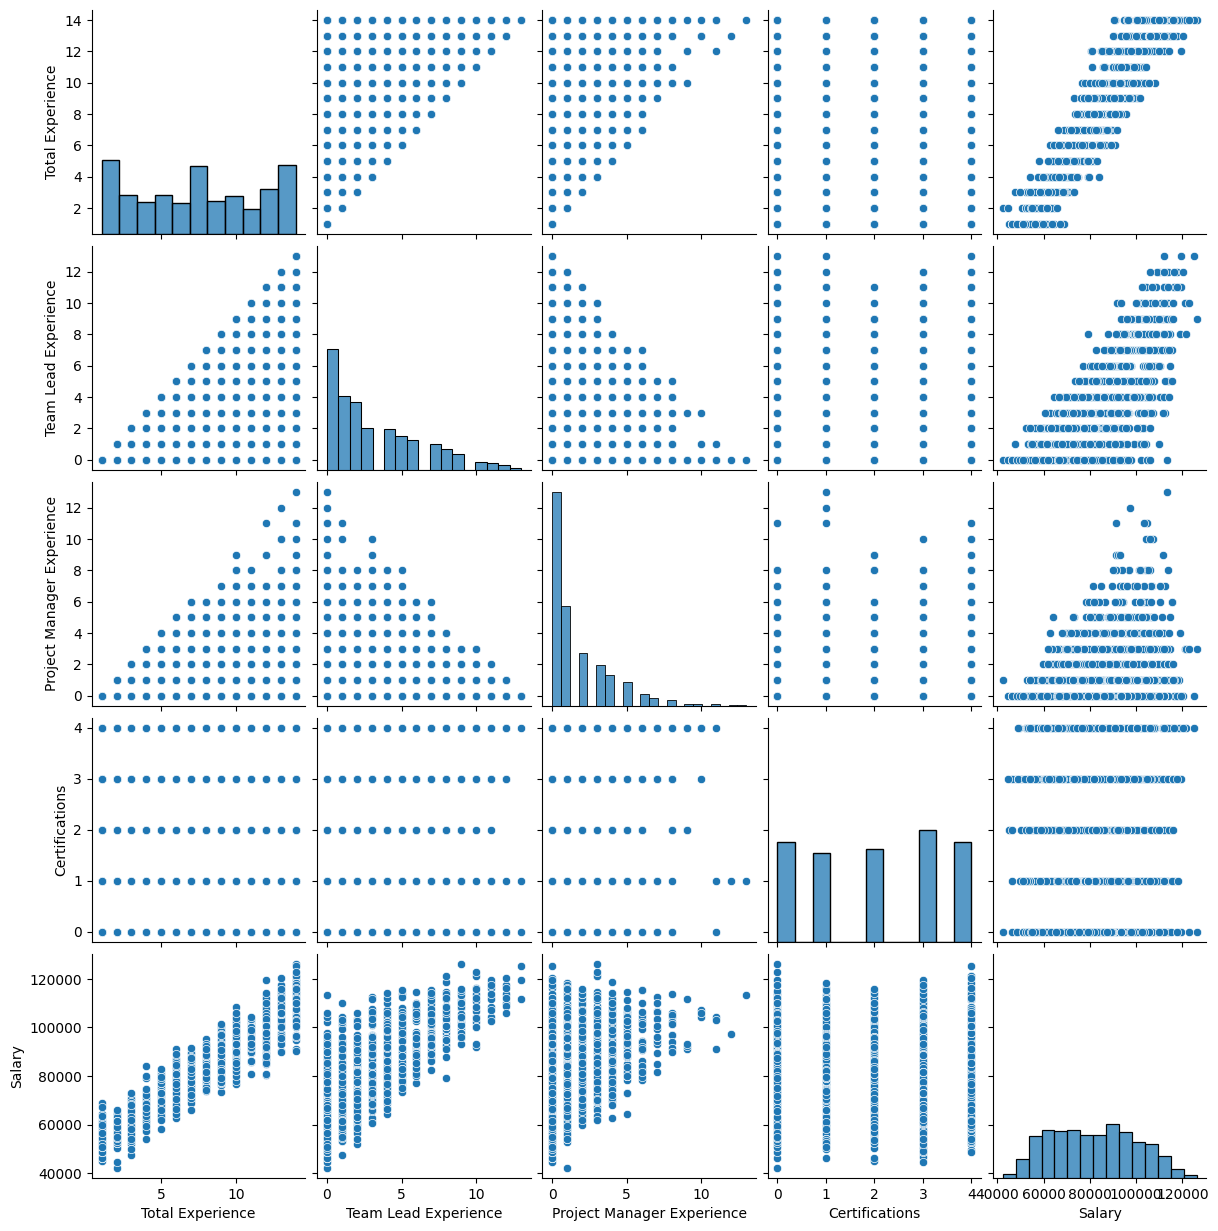

In [11]:
sns.pairplot(df)

In [12]:
df.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687


In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
##standardizartion
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
##model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
score=r2_score(y_test,y_pred)
print(score)

0.939693489164575


0.9396995892116389


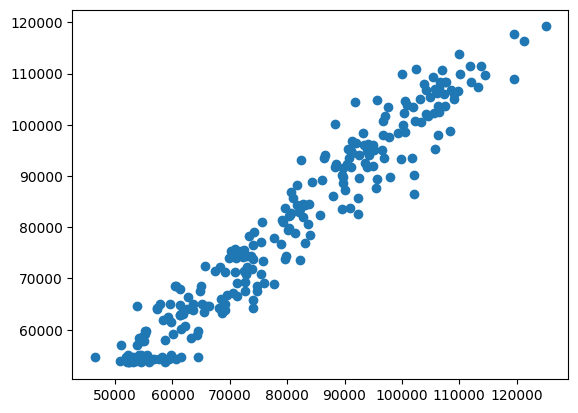

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

In [32]:
ridge

Ridge()

In [33]:
scaler

StandardScaler()

In [34]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))